In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('main_df.csv') 

In [3]:
df.head()

,Index,Area,Item,Year,pesticides_tonnes,average_rain_fall_mm_per_year,avg_temp,MEASURE,INDICATOR,hg/ha_yield
0,0,Ghana,Maize,1990,65.8,1187,26.73,THND_HA,CROPYIELD,11889
1,1,Ghana,Maize,1991,65.8,1187,26.60,THND_HA,CROPYIELD,15260
2,2,Ghana,Maize,1992,65.8,1187,26.47,THND_HA,CROPYIELD,12040
3,3,Ghana,Maize,1993,65.8,1187,26.67,THND_HA,CROPYIELD,15092
4,4,Ghana,Maize,1994,65.8,1187,26.62,THND_HA,CROPYIELD,14933


In [4]:
df.tail()

,Index,Area,Item,Year,pesticides_tonnes,average_rain_fall_mm_per_year,avg_temp,MEASURE,INDICATOR,hg/ha_yield
183,183,Zambia,Maize,2009,1670.0,1020,20.76,TONNE_HA,CROPYIELD,20692
184,184,Zambia,Maize,2010,1670.0,1020,21.34,TONNE_HA,CROPYIELD,25871
185,185,Zambia,Maize,2011,1670.0,1020,20.88,TONNE_HA,CROPYIELD,27414
186,186,Zambia,Maize,2012,1670.0,1020,20.80,TONNE_HA,CROPYIELD,26545
187,187,Zambia,Maize,2013,1670.0,1020,20.14,TONNE_HA,CROPYIELD,25382


In [5]:
df= df.rename(index=str, columns={"average_rain_fall_mm_per_year": "avg_rainfall"})

df.head()

,Index,Area,Item,Year,pesticides_tonnes,avg_rainfall,avg_temp,MEASURE,INDICATOR,hg/ha_yield
0,0,Ghana,Maize,1990,65.8,1187,26.73,THND_HA,CROPYIELD,11889
1,1,Ghana,Maize,1991,65.8,1187,26.60,THND_HA,CROPYIELD,15260
2,2,Ghana,Maize,1992,65.8,1187,26.47,THND_HA,CROPYIELD,12040
3,3,Ghana,Maize,1993,65.8,1187,26.67,THND_HA,CROPYIELD,15092
4,4,Ghana,Maize,1994,65.8,1187,26.62,THND_HA,CROPYIELD,14933


In [6]:
df= df.drop(['Index','MEASURE','INDICATOR'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188 entries, 0 to 187
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               188 non-null    object 
 1   Item               188 non-null    object 
 2   Year               188 non-null    int64  
 3   pesticides_tonnes  188 non-null    float64
 4   avg_rainfall       188 non-null    int64  
 5   avg_temp           188 non-null    float64
 6   hg/ha_yield        188 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 11.8+ KB


In [8]:
df.describe()

,Year,pesticides_tonnes,avg_rainfall,avg_temp,hg/ha_yield
count,188.000000,188.000000,188.000000,188.000000,188.000000
mean,2001.670213,17148.515745,1026.648936,21.210266,24615.393617
std,7.187911,14985.455600,756.621320,4.252928,14091.685832
min,1990.000000,17.400000,495.000000,14.980000,1587.000000
25%,1995.000000,1080.000000,495.000000,18.195000,14990.500000
50%,2001.000000,18025.000000,1020.000000,21.065000,22274.000000
75%,2008.000000,26857.000000,1187.000000,26.585000,30000.000000
max,2013.000000,61445.600000,2875.000000,30.650000,89681.000000


In [9]:
df["hg/ha_yield"].value_counts()

36351    4
24371    4
27043    4
43671    4
46736    4
        ..
14980    1
61320    1
5207     1
6794     1
32000    1
Name: hg/ha_yield, Length: 115, dtype: int64

In [10]:
df['hg/ha_yield'].nunique()

115

In [11]:
df.isnull().sum()

Area                 0
Item                 0
Year                 0
pesticides_tonnes    0
avg_rainfall         0
avg_temp             0
hg/ha_yield          0
dtype: int64

In [12]:
df.groupby('Item').count()

,Area,Year,pesticides_tonnes,avg_rainfall,avg_temp,hg/ha_yield
Item,,,,,,
Maize,188,188,188,188,188,188


In [13]:
df.groupby(['Item', 'Area'],sort=True)['hg/ha_yield'].sum().nlargest(6)

Item   Area        
Maize  South Africa    2786360
       Malaysia         809703
       Zambia           429235
       Ghana            354169
       Mozambique       182965
       Sudan             65262
Name: hg/ha_yield, dtype: int64

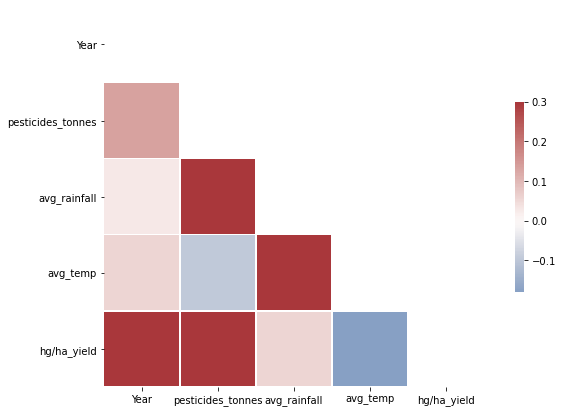

In [14]:
correlation_data=df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(correlation_data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 7))

cmap = sns.palette="vlag"

sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

<AxesSubplot:>

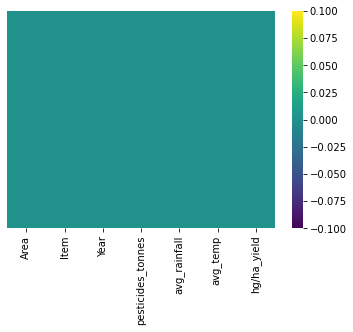

In [15]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

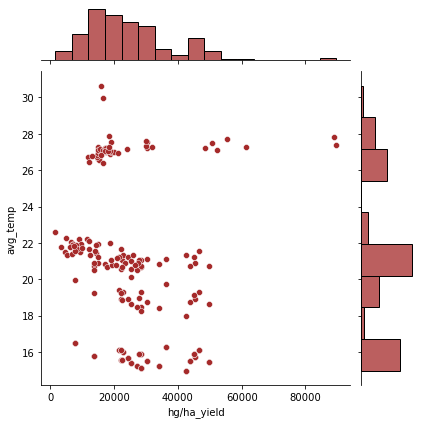

In [16]:
sns.jointplot(data=df,x='hg/ha_yield',y='avg_temp',color='brown')

<AxesSubplot:xlabel='avg_temp', ylabel='Density'>

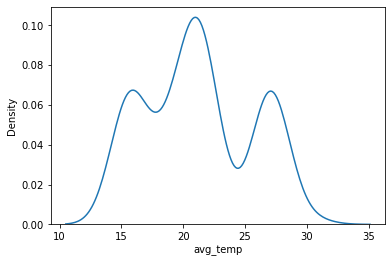

In [17]:
sns.kdeplot(df['avg_temp'])

<AxesSubplot:ylabel='Frequency'>

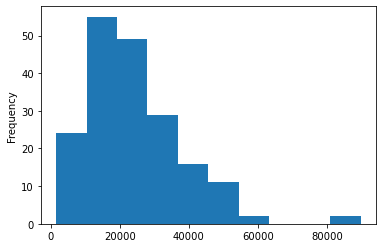

In [18]:
df["hg/ha_yield"].plot.hist()

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
df_onehot = pd.get_dummies(df, columns=["Item"], prefix = ["Item"])
new=df_onehot.loc[:, df_onehot.columns != 'hg/ha_yield']
label=df['hg/ha_yield']

new.head()

,Area,Year,pesticides_tonnes,avg_rainfall,avg_temp,Item_Maize
0,Ghana,1990,65.8,1187,26.73,1
1,Ghana,1991,65.8,1187,26.60,1
2,Ghana,1992,65.8,1187,26.47,1
3,Ghana,1993,65.8,1187,26.67,1
4,Ghana,1994,65.8,1187,26.62,1


In [21]:
new = new.drop(['Year', 'Area', 'Item_Maize'], axis=1)

In [22]:
new.info

<bound method DataFrame.info of      pesticides_tonnes  avg_rainfall  avg_temp
0                 65.8          1187     26.73
1                 65.8          1187     26.60
2                 65.8          1187     26.47
3                 65.8          1187     26.67
4                 65.8          1187     26.62
..                 ...           ...       ...
183             1670.0          1020     20.76
184             1670.0          1020     21.34
185             1670.0          1020     20.88
186             1670.0          1020     20.80
187             1670.0          1020     20.14

[188 rows x 3 columns]>

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
new=scaler.fit_transform(new) 

# Train Test Split
Let's split up the data into a training set and a test set!

In [24]:
from sklearn.model_selection import train_test_split

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new, label, test_size=0.30)

# DecisionTree

In [26]:
from sklearn.tree import DecisionTreeRegressor

In [27]:
dtree = DecisionTreeRegressor()

In [28]:
dtree.fit(X_train,y_train)

DecisionTreeRegressor()

In [29]:
prediction = dtree.predict(X_test)

In [59]:
dtree.predict([[65.8,1187,26.73]])[0]

88991.0

In [31]:
predictions=dtree.predict(X_test)

In [32]:
import pickle

In [33]:
file=open('yield_pred_dtree.pkl','wb')
pickle.dump(dtree,file)

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 4819.2807017543855
Mean Squared Error: 72453574.75438596
Root Mean Squared Error: 8511.966562104551
R-squared: 0.6671592396730752


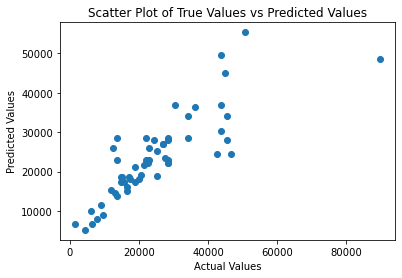

In [35]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True Values vs Predicted Values')
plt.show()

# RandomForest

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
reg=RandomForestRegressor()

In [38]:
reg.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
input_features=[20.8,82.0,6.5]
infprob=reg.predict([input_features])[0]
infprob

77879.95

In [40]:
predictions=reg.predict(X_test)

In [41]:
file=open('yield_pred_rand.pkl','wb')
pickle.dump(reg,file)

In [42]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 50649785.72663746


In [43]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 4364.476355889724
Mean Squared Error: 50649785.72663746
Root Mean Squared Error: 7116.866285566805
R-squared: 0.7673225475927353


# K-Nearest Neighbor(KNN)

In [44]:
from sklearn.neighbors import KNeighborsRegressor  
knn= KNeighborsRegressor(n_neighbors=5, metric='minkowski', p=3 )  
knn.fit(X_train, y_train)  

KNeighborsRegressor(p=3)

In [45]:
KNNINT=[20.8,82.0,1.3]
result=knn.predict([KNNINT])[0]
result

61281.6

In [46]:
knnprediction=knn.predict(X_test)

In [47]:
file=open('yield_pred_knn.pkl','wb')
pickle.dump(knn,file)

In [48]:
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Absolute Error: 4364.476355889724
Mean Squared Error: 50649785.72663746
Root Mean Squared Error: 7116.866285566805
R-squared: 0.7673225475927353


# Support Vector Machine Algorithm(SVM)

In [49]:
from sklearn import svm
from sklearn.svm import SVR  
svr = SVR(kernel='linear')  
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [50]:
SVR=[26.986037,89.413849,6.260839]
results=svr.predict([SVR])[0]
results

22157.29894480758

In [51]:
svrprediction=svr.predict(X_test)

In [52]:
file=open('yield_pred_svr.pkl','wb')
pickle.dump(svr,file)

In [53]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(new, label, test_size=0.3, random_state=42)

In [54]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit=model.fit(train_data,train_labels)
    y_pred=fit.predict(test_data)
    r2=r2_score(test_labels,y_pred)
    return([model_name,r2])

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),
     RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),
    svm.SVR(),
   DecisionTreeRegressor()
]

In [56]:
model_train=list(map(compare_models,models)) 

In [57]:
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.6049344722655409]
['RandomForestRegressor', 0.7650815507293778]
['SVR', -0.025328122682621412]
['DecisionTreeRegressor', 0.563021951935613]


In [58]:
file=open('yield_pred_models.pkl','wb')
pickle.dump(models,file)